## **Ex.1 - Loading the dataset**

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

In [5]:
from sklearn.decomposition import PCA
from sklearn import decomposition

pca = PCA(n_components=2)
pca.fit(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca = pca.transform(X_train_std)

print("Norms of the first two principal components: {}".format(pca.singular_values_))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

principalDf = pd.DataFrame(data = X_test_pca
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_test)], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2', 'class']

finalDf.head()

Norms of the first two principal components: [24.40609911 17.23864914]
Explained variance ratio: [0.36951469 0.18434927]


,principal component 1,principal component 2,class
0,-2.235751,1.861806,1
1,0.537318,-1.661339,2
2,-2.362042,1.147674,1
3,-2.097719,-0.155720,1
4,-2.171636,-1.443650,2


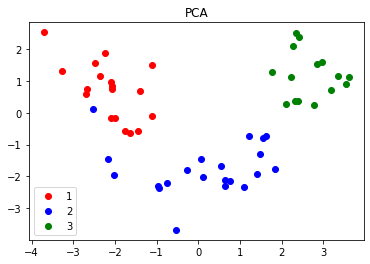

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from time import sleep

unique_y = np.unique(y_test)

cdict = {1: 'red', 2: 'blue', 3: 'green'}

for y in unique_y:
    plt.scatter(finalDf['principal component 1'].where(finalDf['class'] == y), 
                finalDf['principal component 2'].where(finalDf['class'] == y),
                 c = cdict[y], 
                label=y);
    plt.title('PCA');
    plt.legend(np.unique(y_test));

### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score
from ipywidgets import interact, widgets

In [8]:
# Combining PCA and LR

In [9]:
lr_pca = LogisticRegression(random_state=1, C=1).fit(X_train_pca, y_train)

print("Linear Regression PCA train score: {:.2f}".format(lr_pca.score(X_train_pca, y_train)))
print("Linear Regression PCA test score: {:.2f}".format(lr_pca.score(X_test_pca, y_test)))

print("Confusion Matrix for the Test Data:")
print(confusion_matrix(y_test, lr_pca.predict(X_test_pca)))

Linear Regression PCA train score: 0.98
Linear Regression PCA test score: 0.93
Confusion Matrix for the Test Data:
[[15  3  0]
 [ 1 20  0]
 [ 0  0 15]]


In [10]:
# Let's try to use cross validation to define a better C parameter

In [11]:
def cv_and_train_pca_lr(variable_C):
    lr_pca = LogisticRegression(random_state=1, C=variable_C).fit(X_train_pca, y_train)

    print("Linear Regression PCA train score: {:.2f}".format(lr_pca.score(X_train_pca, y_train)))
    print("Linear Regression PCA test score: {:.2f}".format(lr_pca.score(X_test_pca, y_test)))

    cv_scores = cross_val_score(lr_pca, X_train_pca, y_train, cv=5)
    print('CV Scores (5 folds):', cv_scores)

    print("Confusion Matrix for the Test Data:")
    print(confusion_matrix(y_test, lr_pca.predict(X_test_pca)))

    X_combined_pca = np.vstack((X_train_pca, X_test_pca))
    y_combined = np.hstack((y_train, y_test))

    plot_decision_regions(X_combined_pca, y_combined, lr_pca)


interact(cv_and_train_pca_lr, 
variable_C=widgets.FloatSlider(min=1, max=100, step=.1, value=1.0));

interactive(children=(FloatSlider(value=1.0, description='variable_C', min=1.0), Output()), _dom_classes=('wid…

In [12]:
# The lower the regularization parameter C, the better the model performs on the test data and it also has a more uniform performance over all folds

In [13]:
# Simpler Approach - Original Features

In [14]:
def cv_and_train_simple_lr(variable_C):
    lr = LogisticRegression(random_state=1, C=variable_C).fit(X_train_std, y_train)

    print("Linear Regression train score: {:.2f}".format(lr.score(X_train_std, y_train)))
    print("Linear Regression test score: {:.2f}".format(lr.score(X_test_std, y_test)))

    cv_scores = cross_val_score(lr, X_train_pca, y_train, cv=5)
    print('CV Scores (5 folds):', cv_scores)

    print("Confusion Matrix for the Test Data:")
    print(confusion_matrix(y_test, lr.predict(X_test_std)))


interact(cv_and_train_simple_lr, 
variable_C=widgets.FloatSlider(min=1, max=100, step=.1, value=1.0));

interactive(children=(FloatSlider(value=1.0, description='variable_C', min=1.0), Output()), _dom_classes=('wid…

In [15]:
# The lower the regularization parameter C, the better the model performs on the test data and it also has a more uniform performance over all folds